In [1]:
# dev mode
import sys

# add path
sys.path.insert(0, "../../code/src/")

# interactively load the module
%load_ext autoreload
%autoreload 2

In [2]:
from hierarchical_grouping.file_reader import BinaryPolygonFileReader, test_load_module
from hierarchical_grouping.utils import plot_two_polys
import shapely.plotting
import networkx as nx

'''
    Name,            number of sets
    data_auerberg,              796
    data_dottendorf,            871
    data_duisdorf,             2127
    data_endenich,             1060
    data_zentrum,               160
'''
file_path = "../data/data_auerberg"
reader = BinaryPolygonFileReader(file_path)

In [24]:
set_id, polys1, polys2 = reader.read_next_set()
print("set_id: ", set_id)
print("Length polys1: ", len(polys1))
print("Length polys2: ", len(polys2))

set_id:  7
Length polys1:  0
Length polys2:  3


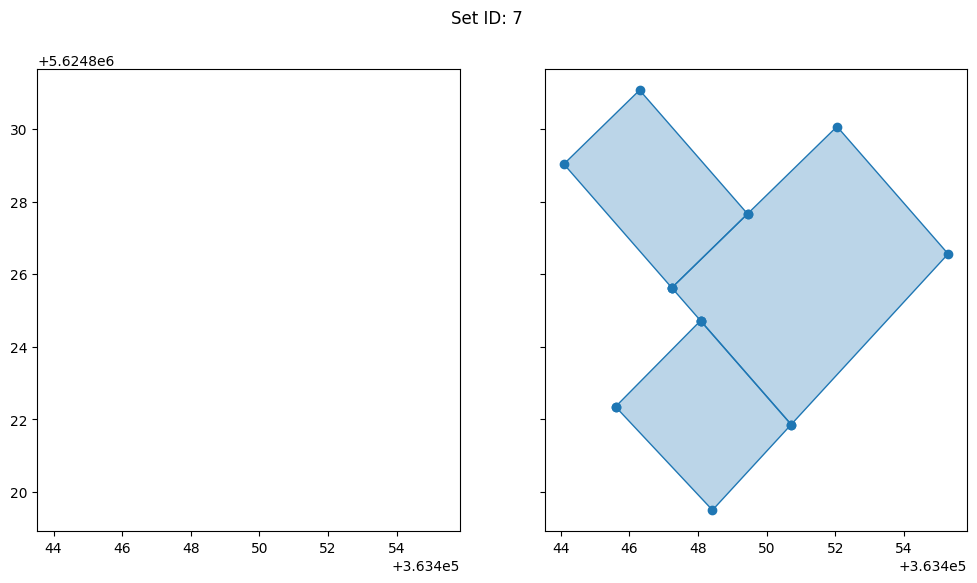

In [25]:
plot_two_polys(polys1, polys2, set_id)

In [17]:
set_id, polys1, polys2 = reader[8] 

# Scatter
# 3, 116, 194
# Line
# 4, 8, 15, 19, 26, 31(small leaves), 38, 43, 47, 48, 66, 76, 104, 105, 131, 141, 142, 173, 187
# Form a circle
# 62, 64, 119, 133, 134, 143, 77, 86, 92, 112, 143, 158, 159, 177
# Complicated 
# 0, 18, 37, 138, 185

# 1. Edges generation/initialization
[networkx](https://networkx.org/documentation/stable/tutorial.html)  
[Polygon](https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html)  


## 1.1 Centroid

In [6]:
for poly in polys2:
    print(poly.centroid)
    
# create two graph and add nodes along with their centroid. Would be nice to add centroid
# https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html

POINT (363425.4165890847 5624825.291820308)
POINT (363435.30199667 5624834.610154186)
POINT (363430.84124829393 5624829.867643014)
POINT (363439.21312822675 5624838.198907769)


## 1.2 Init Graph andNodes.

In [7]:
import networkx as nx
G = nx.Graph()

In [8]:
c = 0
for poly in polys2:
    node_attributes = {
        "poly": poly,
        # "centroid": poly.centroid,
        # "x": poly.centroid.x,
        # "y": poly.centroid.y,
    }
    node = (c, node_attributes)
    c = c + 1
    G.add_nodes_from([node])

In [9]:
for i in range(len(polys2)):
    print(G.nodes[i])

{'poly': <POLYGON ((363426.141 5624819.766, 363430.888 5624824.144, 363424.674 562483...>}
{'poly': <POLYGON ((363433.745 5624833.246, 363432.909 5624832.475, 363435.819 562482...>}
{'poly': <POLYGON ((363430.754 5624836.489, 363424.674 5624830.881, 363430.888 562482...>}
{'poly': <POLYGON ((363437.469 5624843.031, 363434.068 5624839.894, 363440.143 562483...>}


In [10]:
G.nodes.data()

NodeDataView({0: {'poly': <POLYGON ((363426.141 5624819.766, 363430.888 5624824.144, 363424.674 562483...>}, 1: {'poly': <POLYGON ((363433.745 5624833.246, 363432.909 5624832.475, 363435.819 562482...>}, 2: {'poly': <POLYGON ((363430.754 5624836.489, 363424.674 5624830.881, 363430.888 562482...>}, 3: {'poly': <POLYGON ((363437.469 5624843.031, 363434.068 5624839.894, 363440.143 562483...>}})

# 1.3 Edges gen based on distance only.

In [11]:
for i in range(4):
    j = i + 1
    for j in range(j, 4):
        print(i, j)
    # print(G.nodes[i])
    # https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/
    # https://www.geeksforgeeks.org/what-is-minimum-spanning-tree-mst/

0 1
0 2
0 3
1 2
1 3
2 3


In [12]:
for i in range(len(polys1)):
    j = i + 1
    for j in range(j, len(polys1)):
        dist = G.nodes[i]['poly'].distance(G.nodes[j]['poly'])
        dist_centroid = G.nodes[i]['poly'].centroid.distance(G.nodes[j]['poly'].centroid)
        # print('i', G.nodes[i]['poly'].centroid)
        # print('j', G.nodes[j]['poly'].centroid)
        print(i, j, dist_centroid)
        # G.add_edge(i, j, weight= )
    # print(G.nodes[i])
# sqrt((363425.4165-363435.3019)**2 + ( 5624825.2918-5624834.6101)**2)

0 1 13.58501488379042


In [13]:
for i in range(len(polys2)):
    j = i + 1
    for j in range(j, len(polys2)):
        dist = G.nodes[i]['poly'].distance(G.nodes[j]['poly'])
        dist_centroid = G.nodes[i]['poly'].centroid.distance(G.nodes[j]['poly'].centroid)
        # print('i', G.nodes[i]['poly'].centroid)
        # print('j', G.nodes[j]['poly'].centroid)
        print(i, j, dist_centroid)
        # G.add_edge(i, j, weight= )
    # print(G.nodes[i])
# sqrt((363425.4165-363435.3019)**2 + ( 5624825.2918-5624834.6101)**2)

0 1 13.58501488379042
0 2 7.096835982840715
0 3 18.89278695761469
1 2 6.5107363868259664
1 3 5.308116646502809
2 3 11.810941793054909


# 1.3 MST.